In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

### Licitação:


In [2]:
dados_licitacao = pd.read_csv ('./2019/licitacao.csv', sep=',', encoding='UTF-8')
dados_licitacao.head()

C:\Users\Lucas\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (53,54) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,CD_ORGAO,NM_ORGAO,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,NR_COMISSAO,ANO_COMISSAO,TP_COMISSAO,NR_PROCESSO,ANO_PROCESSO,...,TP_DOCUMENTO_FORNECEDOR,NR_DOCUMENTO_FORNECEDOR,TP_DOCUMENTO_VENCEDOR,NR_DOCUMENTO_VENCEDOR,VL_HOMOLOGADO,BL_GERA_DESPESA,DS_OBSERVACAO,PC_TX_ESTIMADA,PC_TX_HOMOLOGADA,BL_COMPARTILHADA
0,53100,PM DE NOVA PALMA,3.0,2019,TMP,6679.0,2018.0,P,101,2019.0,...,NaN,NaN,J,09616071000198,272269.69,S,NaN,NaN,NaN,N
1,53100,PM DE NOVA PALMA,1.0,2019,TMP,6679.0,2018.0,P,035,2019.0,...,NaN,NaN,J,09616071000198,75363.72,S,NaN,NaN,NaN,N
2,51802,CIA. ÁGUAS TERMAIS MARCELINO RAMOS - TERMASA,3.0,2019,EST,1.0,2018.0,P,3,2019.0,...,NaN,NaN,J,23178651000171,126240.00,N,NaN,NaN,NaN,N
3,84100,PM DE ESPERANÇA DO SUL,34.0,2019,CNV,326.0,2017.0,P,415,2019.0,...,NaN,NaN,J,90167065000119,9600.00,S,NaN,NaN,NaN,N
4,86800,PM DE BOA VISTA DO SUL,3.0,2019,PRP,4.0,2019.0,G,004,2019.0,...,NaN,NaN,J,02934207000169,430770.00,S,NaN,NaN,NaN,N


- Verificação dos nomes das colunas do dataframe

In [3]:
dados_licitacao.columns.values

array(['CD_ORGAO', 'NM_ORGAO', 'NR_LICITACAO', 'ANO_LICITACAO',
       'CD_TIPO_MODALIDADE', 'NR_COMISSAO', 'ANO_COMISSAO', 'TP_COMISSAO',
       'NR_PROCESSO', 'ANO_PROCESSO', 'TP_OBJETO', 'CD_TIPO_FASE_ATUAL',
       'TP_LICITACAO', 'TP_NIVEL_JULGAMENTO', 'DT_AUTORIZACAO_ADESAO',
       'TP_CARACTERISTICA_OBJETO', 'TP_NATUREZA', 'TP_REGIME_EXECUCAO',
       'BL_PERMITE_SUBCONTRATACAO', 'TP_BENEFICIO_MICRO_EPP',
       'TP_FORNECIMENTO', 'TP_ATUACAO_REGISTRO', 'NR_LICITACAO_ORIGINAL',
       'ANO_LICITACAO_ORIGINAL', 'NR_ATA_REGISTRO_PRECO',
       'DT_ATA_REGISTRO_PRECO', 'PC_TAXA_RISCO', 'TP_EXECUCAO',
       'TP_DISPUTA', 'TP_PREQUALIFICACAO', 'BL_INVERSAO_FASES',
       'TP_RESULTADO_GLOBAL', 'CNPJ_ORGAO_GERENCIADOR',
       'NM_ORGAO_GERENCIADOR', 'DS_OBJETO', 'CD_TIPO_FUNDAMENTACAO',
       'NR_ARTIGO', 'DS_INCISO', 'DS_LEI', 'DT_INICIO_INSCR_CRED',
       'DT_FIM_INSCR_CRED', 'DT_INICIO_VIGEN_CRED', 'DT_FIM_VIGEN_CRED',
       'VL_LICITACAO', 'BL_ORCAMENTO_SIGILOSO',
       'BL

- Obter informações sobre cada coluna e seu tipo

In [4]:
dados_licitacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70546 entries, 0 to 70545
Data columns (total 61 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CD_ORGAO                     70546 non-null  int64  
 1   NM_ORGAO                     70546 non-null  object 
 2   NR_LICITACAO                 70546 non-null  float64
 3   ANO_LICITACAO                70546 non-null  int64  
 4   CD_TIPO_MODALIDADE           70546 non-null  object 
 5   NR_COMISSAO                  42584 non-null  float64
 6   ANO_COMISSAO                 42584 non-null  float64
 7   TP_COMISSAO                  42584 non-null  object 
 8   NR_PROCESSO                  70462 non-null  object 
 9   ANO_PROCESSO                 70463 non-null  float64
 10  TP_OBJETO                    70546 non-null  object 
 11  CD_TIPO_FASE_ATUAL           70546 non-null  object 
 12  TP_LICITACAO                 70546 non-null  object 
 13  TP_NIVEL_JULGAME

- Verificação do tamanho das linhas e colunas

In [6]:
dados_licitacao.shape

(70546, 61)

- Separação das colunas importantes para a criação de um novo dataframe

In [7]:
col_licitacao = ['CD_ORGAO', 'NR_LICITACAO','TP_OBJETO', 'DS_OBJETO']

licitacao_df = dados_licitacao.filter(items = col_licitacao)

- Como recomendado, em relação a coluna *'TP_OBJETO'*, utilizou-se apenas as linhas cujo tipo de objeto = *COM* (compras)

In [8]:
licitacao_df = licitacao_df[(licitacao_df.TP_OBJETO == 'COM')]

objeto = licitacao_df.groupby(by=['DS_OBJETO'])

licitacao_df.head()

,CD_ORGAO,NR_LICITACAO,TP_OBJETO,DS_OBJETO
5,45003,79.0,COM,Aquisição de 78.000 (setenta e oito mil) quilo...
6,45003,10.0,COM,"Aquisição de 3.700 kg de polímero não iônico, ..."
7,45003,7.0,COM,Aquisição de 65 t (sessenta e cindo toneladas)...
8,45003,38.0,COM,Aquisição de 40.500 (quarenta mil e quinhentos...
9,45003,68.0,COM,Aquisição de Larvicida biológico BTI (Bacillus...


- Remoção da coluna *'TP_OBJETO'*

In [9]:
licitacao_df.drop(['TP_OBJETO'], axis = 1, inplace = True)

- Verificação detalhada da coluna DS_OBJETO.

*Para melhor processamento, fora criado um dataframe apenas com a coluna em questão e a coluna CD_ORGAO*

In [10]:
verification_df = licitacao_df[['CD_ORGAO','DS_OBJETO']]
ProfileReport(verification_df)

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

- Verificação dos objetos mais vendidos no dataframe de licitação

In [11]:
licitacao_df['DS_OBJETO'].value_counts().head(15)


AQUISIÇÃO DE MEDICAMENTOS PARA MANUTENÇÃO DOS SERVIÇOS DE DISTRIBUIÇÃO À POPULAÇÃO DESENVOLVIDA PELA SECRETARIA MUNICIPAL DA SAÚDE     52
AQUISIÇÃO DE BENS DA(S) FAMÍLIA(S):0830-EQUIPAMENTOS/MATERIAIS P/LABORATORIO;                                                          32
AQUISIÇÃO DE TUBOS DE CONCRETO                                                                                                         24
AQUISIÇÃO DE MEDICAMENTOS                                                                                                              24
AQUISIÇÃO DE BENS DA(S) FAMÍLIA(S):0035-EQUIPAMENTOS P/INFORMATICA;                                                                    24
AQUISIÇÃO DE BENS DA(S) FAMÍLIA(S):0870-EQUIPAMENTOS/MATERIAIS MEDICO-HOSPITALARES/ENFERMAGEM;                                         23
AQUISIÇÃO DE MERENDA ESCOLAR                                                                                                           23
AQUISIÇÃO DE BENS DA(S) FAMÍLIA(S)

- Verificação da existência de algum dado nulo

In [12]:
licitacao_df.isna().sum()

CD_ORGAO        0
NR_LICITACAO    0
DS_OBJETO       0
dtype: int64

### Itens:

In [13]:
dados_item = pd.read_csv ('./2019/item.csv', sep=',', encoding='UTF-8')
dados_item

C:\Users\Lucas\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (8,25,26,27) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,CD_ORGAO,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,NR_LOTE,NR_ITEM,NR_ITEM_ORIGINAL,DS_ITEM,QT_ITENS,SG_UNIDADE_MEDIDA,...,TP_ORCAMENTO,CD_TIPO_FAMILIA,CD_TIPO_SUBFAMILIA,TP_DOCUMENTO,NR_DOCUMENTO,TP_DOCUMENTO.1,NR_DOCUMENTO.1,TP_BENEFICIO_MICRO_EPP,PC_TX_ESTIMADA,PC_TX_HOMOLOGADA
0,76600,18.0,2019,PRP,1,140,140,Tubo de coleta a vácuo com citrato de sódio (3...,100.0,UN,...,NaN,NaN,NaN,J,21112395000194,NaN,NaN,L,NaN,NaN
1,76600,18.0,2019,PRP,1,136,136,Sonda tubo endo traqueal descartável com balão...,2.0,UN,...,NaN,NaN,NaN,J,21112395000194,NaN,NaN,L,NaN,NaN
2,76600,18.0,2019,PRP,1,130,130,"Lanceta de punção manual 21g 1,8mm x 0,8mm",300.0,UN,...,NaN,NaN,NaN,J,21112395000194,NaN,NaN,L,NaN,NaN
3,76600,18.0,2019,PRP,1,129,129,Lamina de bisturi 22,100.0,UN,...,NaN,NaN,NaN,J,21112395000194,NaN,NaN,L,NaN,NaN
4,76600,18.0,2019,PRP,1,128,128,Hastes flexíveis com pontas de algodão (tipo c...,600.0,UN,...,NaN,NaN,NaN,J,21112395000194,NaN,NaN,L,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884555,68800,2.0,2019,PRE,1,13,13,Pneu 195/60R15 88V S/C,4.0,UN,...,NaN,NaN,NaN,J,17450564000129,NaN,NaN,N,NaN,NaN
884556,68800,2.0,2019,PRE,1,14,14,Pneu 185/70R14 88T S/C,4.0,UN,...,NaN,NaN,NaN,J,17450564000129,NaN,NaN,N,NaN,NaN
884557,68800,2.0,2019,PRE,1,15,15,Pneu 7.50-16 10 lonas p/ implemento (Grade),2.0,UN,...,NaN,NaN,NaN,J,17450564000129,NaN,NaN,N,NaN,NaN
884558,68800,2.0,2019,PRE,1,17,17,Pneu 6.00-16 / 6 lonas implemento agrícola,2.0,UN,...,NaN,NaN,NaN,J,17450564000129,NaN,NaN,N,NaN,NaN


- Verificação dos nomes das colunas do dataframe

In [14]:
dados_item.columns.values

array(['CD_ORGAO', 'NR_LICITACAO', 'ANO_LICITACAO', 'CD_TIPO_MODALIDADE',
       'NR_LOTE', 'NR_ITEM', 'NR_ITEM_ORIGINAL', 'DS_ITEM', 'QT_ITENS',
       'SG_UNIDADE_MEDIDA', 'VL_UNITARIO_ESTIMADO', 'VL_TOTAL_ESTIMADO',
       'DT_REF_VALOR_ESTIMADO', 'PC_BDI_ESTIMADO',
       'PC_ENCARGOS_SOCIAIS_ESTIMADO', 'CD_FONTE_REFERENCIA',
       'DS_FONTE_REFERENCIA', 'TP_RESULTADO_ITEM',
       'VL_UNITARIO_HOMOLOGADO', 'VL_TOTAL_HOMOLOGADO',
       'PC_BDI_HOMOLOGADO', 'PC_ENCARGOS_SOCIAIS_HOMOLOGADO',
       'TP_ORCAMENTO', 'CD_TIPO_FAMILIA', 'CD_TIPO_SUBFAMILIA',
       'TP_DOCUMENTO', 'NR_DOCUMENTO', 'TP_DOCUMENTO.1', 'NR_DOCUMENTO.1',
       'TP_BENEFICIO_MICRO_EPP', 'PC_TX_ESTIMADA', 'PC_TX_HOMOLOGADA'],
      dtype=object)

- Separação das colunas importantes para a criação de um novo dataframe

In [15]:
col_item = ['CD_ORGAO', 'NR_LICITACAO', 'DS_ITEM','VL_UNITARIO_HOMOLOGADO']

item_df = dados_item.filter(items = col_item)

In [16]:
item_df

,CD_ORGAO,NR_LICITACAO,DS_ITEM,VL_UNITARIO_HOMOLOGADO
0,76600,18.0,Tubo de coleta a vácuo com citrato de sódio (3...,0.4800
1,76600,18.0,Sonda tubo endo traqueal descartável com balão...,3.8996
2,76600,18.0,"Lanceta de punção manual 21g 1,8mm x 0,8mm",0.3255
3,76600,18.0,Lamina de bisturi 22,0.2570
4,76600,18.0,Hastes flexíveis com pontas de algodão (tipo c...,0.0160
...,...,...,...,...
884555,68800,2.0,Pneu 195/60R15 88V S/C,230.0000
884556,68800,2.0,Pneu 185/70R14 88T S/C,220.0000
884557,68800,2.0,Pneu 7.50-16 10 lonas p/ implemento (Grade),398.0000
884558,68800,2.0,Pneu 6.00-16 / 6 lonas implemento agrícola,280.0000


- Verificação dos itens mais vendidos 

In [17]:
item_df['DS_ITEM'].value_counts()

LIVRO                                                                               760
SERVIÇO                                                                             528
FILTRO                                                                              458
SERVIÇOS GERAIS                                                                     328
MÃO DE OBRA                                                                         281
                                                                                   ... 
TE DE PVC OCRE ESGOTO DIAMETRO 150MM COM REDUÇÃO PARA 100MM,                          1
Alvenaria em tijolo cerâmico maciço 5x10x20 cm                                        1
Fitilhos decorativos 5mm azul c/ 50m                                                  1
Fórceps adulto em inox n° 18r (referencia: edlo ou duflex)                            1
AUXÍLIO TRANSPORTE AOS ESTUDANTES UNIVERSITÁRIOS DE ALPESTRE- RS 1° MÊS- OUTUBRO      1
Name: DS_ITEM, Length: 665844, d

#### Merge dos dois dataframes:

- *"Fusão" dos dataframes de Licitação e Itens a partir das colunas que ambos têm em comum*

In [18]:
new_df = pd.merge(item_df, licitacao_df, on= ['CD_ORGAO', 'NR_LICITACAO'], how= 'inner')

- Excluir linhas duplicadas

In [19]:
new_df = new_df.drop_duplicates()
new_df

,CD_ORGAO,NR_LICITACAO,DS_ITEM,VL_UNITARIO_HOMOLOGADO,DS_OBJETO
0,76600,18.0,Tubo de coleta a vácuo com citrato de sódio (3...,0.4800,Aquisição de medicamentos e correlatos e serem...
1,76600,18.0,Sonda tubo endo traqueal descartável com balão...,3.8996,Aquisição de medicamentos e correlatos e serem...
2,76600,18.0,"Lanceta de punção manual 21g 1,8mm x 0,8mm",0.3255,Aquisição de medicamentos e correlatos e serem...
3,76600,18.0,Lamina de bisturi 22,0.2570,Aquisição de medicamentos e correlatos e serem...
4,76600,18.0,Hastes flexíveis com pontas de algodão (tipo c...,0.0160,Aquisição de medicamentos e correlatos e serem...
...,...,...,...,...,...
907450,8900,353.0,"Bateria chumbo ácida, selada, regulada por vál...",84.0000,"Aquisição de baterias 9Ah, 12Volts."
907451,62000,84.0,Caminhão Bitruck,338000.0000,AQUISIÇÃO DE CAMINHÃO BITRUCK
907452,88140,1404.0,COMPUTADOR - DESKTOP I3 1 MONITOR - FASE,3107.0000,AQUISIÇÃO DE BENS DA(S) FAMÍLIA(S):0035-EQUIPA...
907453,7100,1150.0,MÓDULO FIF ...,1702.5000,AQUISIÇÃO DE MATERIAIS PARA MANUTENÇÃO CORRETI...


#### **Quais são os principais bens materiais comprados pelos órgãos públicos do RS?**

- Abaixo constam os 50 itens mais vendidos:

In [20]:
itens_mais_comprados = new_df['DS_ITEM'].value_counts().head(10)
new_df['DS_ITEM'].value_counts().head(50)


LIVRO                                                                   503
CENOURA                                                                 389
BETERRABA                                                               362
FILTRO                                                                  310
CEBOLA                                                                  304
BATATA DOCE                                                             275
REPOLHO                                                                 273
ALFACE                                                                  265
SERVIÇO                                                                 257
ALHO                                                                    256
CHUCHU                                                                  227
TOMATE                                                                  225
BATATA INGLESA                                                          222
PNEU        

- *Boxplot* para representar a distribuição e valores discrepantes (outliers) dos dados por meio de quartis dos itens mais comprados:


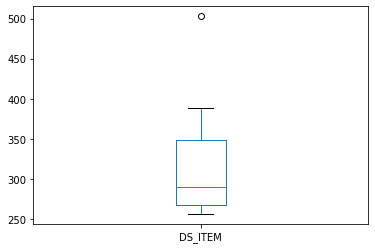

In [21]:
itens_mais_comprados.plot.box()
plt.show()

- Abaixo, observa-se o gráfico dos 10 itens mais comprados, com destaque aos 2 mais comprados de 2019

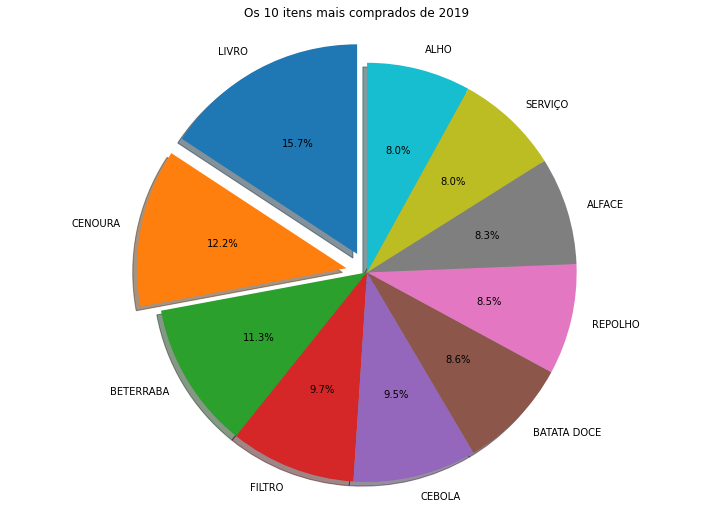

In [23]:
fig = plt.figure(figsize =(10, 7)) 
# o atributo explode indica que fatia do gráfico será destacada. No exemplo abaixo, serão a primeira e segunda fatia. A quantidade de valores é igual ao número de fatias do gráfico. 
explode = (0.1, 0.1, 0, 0, 0, 0, 0,0,0,0)


plt.pie(itens_mais_comprados, labels=itens_mais_comprados.index,autopct='%1.1f%%',explode=explode, shadow=True, startangle=90) 
#Centraliza o gráfico
plt.axis('equal')
#Ajusta o espaçamento para evitar o recorte do rótulo
plt.tight_layout()
plt.title('Os 10 itens mais comprados de 2019')
plt.show() 

- Validação do item mais vendido 

In [24]:
new_df[new_df['DS_ITEM']=='LIVRO']

,CD_ORGAO,NR_LICITACAO,DS_ITEM,VL_UNITARIO_HOMOLOGADO,DS_OBJETO
211363,65000,10.0,LIVRO,32.8,REGISTRO DE PRECOS PARA O FORNECIMENTO DE MATE...
211364,65000,10.0,LIVRO,32.8,REGISTRO DE PRECOS PARA O FORNECIMENTO DE LIVR...
211365,65000,10.0,LIVRO,78.2,REGISTRO DE PRECOS PARA O FORNECIMENTO DE MATE...
211366,65000,10.0,LIVRO,78.2,REGISTRO DE PRECOS PARA O FORNECIMENTO DE LIVR...
211367,65000,10.0,LIVRO,99.8,REGISTRO DE PRECOS PARA O FORNECIMENTO DE MATE...
...,...,...,...,...,...
810704,63500,37.0,LIVRO,NaN,REGISTRO DE PRECOS PARA CONTRATACAO DE FORNECE...
810705,63500,37.0,LIVRO,NaN,CONTRATACAO DE EMPRESA PARA AQUISICAO DE LIVRO...
822599,63500,38.0,LIVRO,NaN,REGISTRO DE PRECOS PARA CONTRATACAO DE FORNECE...
822600,63500,38.0,LIVRO,NaN,CONTRATACAO DE EMPRESA PARA AQUISICAO DE LIVRO...


- Numero de linhas sem valor para o item mais comprado

In [25]:
print(f"Número de itens sem valor: {new_df[new_df['DS_ITEM']=='LIVRO']['VL_UNITARIO_HOMOLOGADO'].isna().sum()}")

Número de itens sem valor: 5


- Criação de um dataframe de Itens X Valor unitário homologado:

In [26]:
itens_comprados = new_df[['DS_ITEM', 'VL_UNITARIO_HOMOLOGADO']]
itens_comprados.head()

,DS_ITEM,VL_UNITARIO_HOMOLOGADO
0,Tubo de coleta a vácuo com citrato de sódio (3...,0.4800
1,Sonda tubo endo traqueal descartável com balão...,3.8996
2,"Lanceta de punção manual 21g 1,8mm x 0,8mm",0.3255
3,Lamina de bisturi 22,0.2570
4,Hastes flexíveis com pontas de algodão (tipo c...,0.0160


- Verificação dos itens comprados com o valor zerado

In [27]:
itens_comprados.isna().sum()

DS_ITEM                        0
VL_UNITARIO_HOMOLOGADO    176928
dtype: int64

*Nota-se que há 176928 itens com valor zerado*

- Agrupamento dos itens 

In [28]:
valores_itens = itens_comprados.groupby(by=['DS_ITEM']).sum()
valores_itens

,VL_UNITARIO_HOMOLOGADO
DS_ITEM,
\t\tFORMOTEROL 12MCG + BUDESONIDA 400MCG P/INALAÇÃO C/60 DOSES - REFIL\t,68.64
"\tAbacate, de 1ª qualidade, grau mínimo de maturação, frutas firmes, frutos com no mínimo 300g. Pedidos somente nos meses de fevereiro a julho. Sendo: SMDS: 300 Kg SME: 5.000 Kg\t8,21",0.00
"\tAmeixa vermelha, grau médio de maturação, peso da unidade entre 70 e 100g, de 1ª qualidade. Pedidos somente nos meses de novembro a fevereiro. Sendo: SMDS: 600 Kg SME: 1500 Kg\t10,02",0.00
"\tBanana, caturra, grau de maturação mínimo, peso mínimo por unidade de 120 a 150g, de 1ª qualidade, Sendo: SMDS: 2.000 Kg SME: 8.000 Kg\t4,29",0.00
"\tCADEIRA PARA ESCRITÓRIO Resistente e durável, estrutura de poliuretano, polipropileno, madeira e aço. Enchimento de espuma injetado, com revestimento em courvino. Encosto ergonômico. Apoio para os braços. Pés com rodízio (rodinhas). Regulagem de altura à gás. Deverá apresentar regulagem de altura do encosto. Encosto com função relax. Estrutura interna conta com madeira e eixos de sustentação fabricados em aço cromado. Possuir pistão a gás para a regulagem de altura. Material: poliuretano, polipropileno, madeira, aço e espuma. Altura de 104,5cm x largura de 64,5cm X profundidade de 64cm. Características: poltrona com base giratória; assento com regulagem de altura. Encosto médio com mecanismo de inclinação e altura regulável; Base com acabamento metálico (pintura em pó epóxi); Regulagem de altura do assento deve ser feita nas poltronas com girolift. Deverá possuir tubo selado a ar comprimido para possibilitar um ajuste milimétrico. Assento com formato anatômico e bordas arredondadas; Braço com altura regulável. Enchimento com espuma injetada. Deverá apresentar certificado de conformidade da ABNT. Revestimento preto. Acabamento em pintura metalizada preta. Garantia mínima de 12 meses.",0.00
...,...
"“Locação de uma área de 1,99 hectares no interior do Município de Riozinho/RS, na localidade de Baixa Grande, matrícula n.º 7.750, do Livro n.º 2, fl 1, no registro de imóveis de Rolante/RS, destinado a extração de saibro (lavra de rocha)”.",0.00
“Y” PVC ESGOTO 75MM - JUNÇAO SIMPLES,10.00
"•\tFORD FIESTA FLEX, placa IVT 1033 •\tFORD FIESTA FLEX, placa IVT 1034 •\tFORD FIESTA FLEX, placa IVT 1035",44400.00


- Os 30 itens com maior valor de compra:

In [29]:
itens_mais_vendidos_valor = valores_itens.sort_values(by= ['VL_UNITARIO_HOMOLOGADO'], ascending = False).head(10)
valores_itens.sort_values(by= ['VL_UNITARIO_HOMOLOGADO'], ascending = False).head(30)

,VL_UNITARIO_HOMOLOGADO
DS_ITEM,
ALIENAÇÃO DOS DIREITOS CREDITÓRIOS - FUNDOPEM,4.647000e+08
"PAVIMENTAÇÃO ASFÁLTICA DA RUA 02 DE DEZEMBRO CONTRATAÇÃO DE EMPRESA ESPECIALIZADA PARA EXECUÇÃO DE CONTROLE TECNOLÓGICOS, TERRAPLANAGEM, DRENAGEM, PAVIMENTAÇÃO, SERVIÇOS FINAIS E COMPLEMENTARES, REDE DE ÁGUA NA RUA DOIS DE DEZEMBRO E RECAPEAMENTO ASFÁLTICO DAS RUAS HENRIQUE HOFFMANN E GUILHERME ALBINO MULLER E ENSAIO TECNOLÓGICO DOS MATERIAIS DAS OBRAS ACIMA CITADAS.",3.898865e+07
OBRAS E INSTALAÇÕES,2.981934e+07
"EXECUÇÃO DAS REDES E RAMAIS DAS BACIAS U1, U1B PARCIAL, U2, U2B PARCIAL, J1C, J1D, J1E, J3 COMPLEMENTAR, TRAVESSIAS, EEB’s U1, U1.1, U1.2, U2, U2.1, J1C, J1D, LINHAS DE RECALQUE E READEQUAÇÃO DA EEB J1 PARA SES NO MUNICÍPIO DE CARAZINHO.",2.195065e+07
"Execução das obras de ampliação do SES de Tramandaí - Bacias 4, 6 e 8",1.994455e+07
"Contratação de serviços técnicos especializados de engenharia e arquitetura, a serem executados por pessoa jurídica, mediante o regime de empreitada por preço global, visando a execução da 1ª Etapa Das Intervenções De Restauro do Theatro Sete de Abril, situado na Praça Cel. Pedro Osório nº 160 – Centro – Pelotas/RS",1.825199e+07
OBRAS EM ANDAMENTO,1.698879e+07
"EXECUÇÃO DAS OBRAS DA ESTAÇÃO DE BOMBEAMENTO DE ESGOTOS EBE EF2 FURG, NO MUNICÍPIO DE RIO GRANDE",1.592090e+07
"OBRA DE PAVIMENTACAO ASFALTICA - Contratação de empresa com responsabilidade técnica, para execução de Pavimentação Asfáltica em CBUQ em trechos das Ruas Arnaldo Roberto Seibert, Benno Schuch, Artur Storch, Antônio Viera de Mello, Alfredo Kirst e Estrada dos Alambiques (acesso parque de eventos), totalizando uma área de 25.258,97 m², compreendendo: serviços preliminares, terraplenagem, pavimentação, microdrenagem, sinalizações vertical e horizontal, passeios públicos com acessibilidade e serviços complementares com fornecimento de materiais e mão de obra de acordo com projetos, memorial descritivo, Especificação Técnica, orçamento e cronograma de execução em anexo. Para atendimento a Cédula de Crédito Bancário Nº RS - 67.983/CEF/PROTRANSPORTE-SETOR PÚBLIO",1.511541e+07


- Validação do item com maior valor de compra:

In [30]:
new_df[new_df['DS_ITEM']=='ALIENAÇÃO DOS DIREITOS CREDITÓRIOS - FUNDOPEM']

,CD_ORGAO,NR_LICITACAO,DS_ITEM,VL_UNITARIO_HOMOLOGADO,DS_OBJETO
662064,88370,3.0,ALIENAÇÃO DOS DIREITOS CREDITÓRIOS - FUNDOPEM,464700000.0,AQUISIÇÃO DE BENS DA(S) FAMÍLIA(S):0045-MATERI...


- OBS: Observou-se que, o item mais comprado não é o item que possui maior valor de compra unitária, logo, deixo então, um dataframe com os itens mais vendidos (assim como solicitado), bem como um dataframe com os itens agrupados de maior valor unitário homologado que consta acima.

- Gráfico dos itens mais comprados por valor:

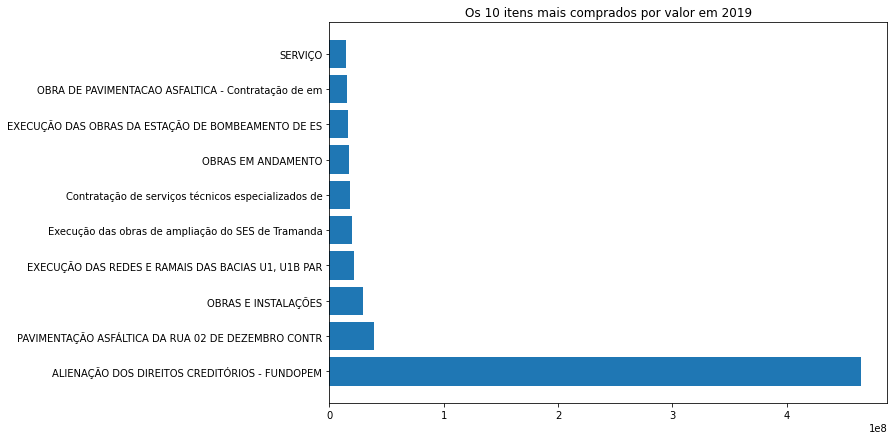

In [31]:
fig = plt.figure(figsize =(10, 7)) 
item_descricao = []
for i in itens_mais_vendidos_valor.index:
    item_descricao.append(i[0:50])

plt.barh(item_descricao,itens_mais_vendidos_valor['VL_UNITARIO_HOMOLOGADO'])
plt.title('Os 10 itens mais comprados por valor em 2019')
plt.show() 

- Agrupamento por Orgão

In [32]:
compras_por_orgao = new_df.groupby(by=['CD_ORGAO']).sum()
compras_por_orgao.drop(['NR_LICITACAO'], axis=1,inplace=True)
mais_comprados_por_orgao = compras_por_orgao.sort_values(by= ['VL_UNITARIO_HOMOLOGADO'], ascending = False).head(10)
mais_comprados_por_orgao

,VL_UNITARIO_HOMOLOGADO
CD_ORGAO,
88370,4.965833e+08
8700,2.076612e+08
61000,5.159731e+07
69400,4.008723e+07
50100,3.251642e+07
60900,3.192428e+07
54400,2.709991e+07
44300,2.344602e+07
88044,2.205909e+07


- Gráfico contendo os códigos dos 10 órgãos que mais compraram (por valor):

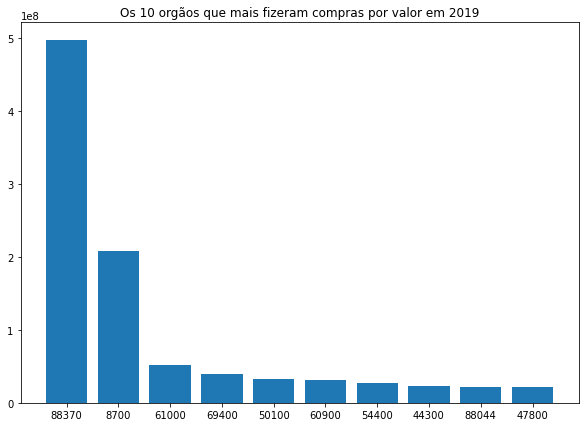

In [33]:
fig = plt.figure(figsize =(10, 7)) 
item_descricao = []
for i in mais_comprados_por_orgao.index:
    item_descricao.append(f'{i}')

plt.bar(item_descricao,mais_comprados_por_orgao['VL_UNITARIO_HOMOLOGADO'])
plt.title('Os 10 orgãos que mais fizeram compras por valor em 2019')
plt.show() 